# 1 standart, min-max, robust 비교 고찰

In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# data
x = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(1, 2, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(50, 2, 25)]),
})

In [30]:
# scaler 선언
scaler = StandardScaler() 

# 데이터프레임 생성
standard_df = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_df, columns=['x1', 'x2'])
standard_df

,x1,x2
0,-0.623384,-0.870948
1,0.792574,-0.279801
2,0.839385,0.503379
3,0.102329,-0.104066
4,0.171783,0.485243
...,...,...
1020,-5.638689,5.917233
1021,-4.973565,5.841313
1022,-5.936538,6.001995
1023,-4.880471,5.105945


In [34]:
scaler = MinMaxScaler() # 선언

# 데이터프레임 생성
minmax_df = scaler.fit_transform(x)
minmax_df = pd.DataFrame(MinMax_df, columns=['x1', 'x2'])

In [32]:
scaler = RobustScaler() # 선언

# 데이터프레임 생성
Robust_df = scaler.fit_transform(x)
Robust_df = pd.DataFrame(Robust_df, columns=['x1', 'x2'])

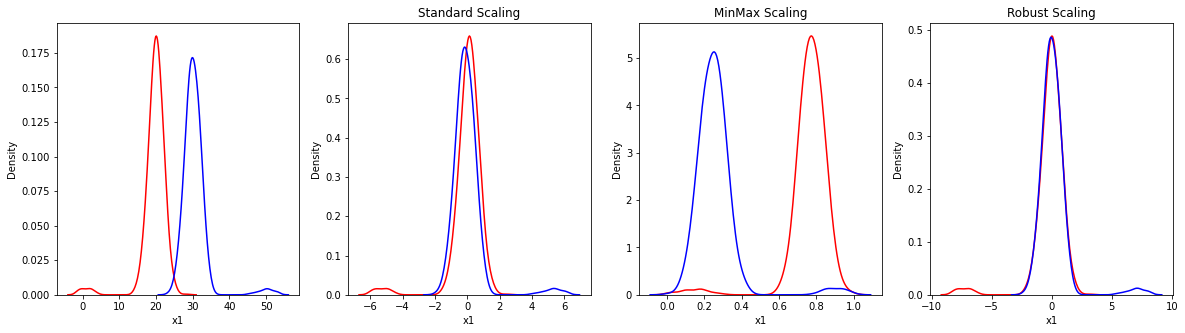

In [36]:
# 그래프 그리기

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20,5))
ax2.set_title("Before Scaling")
sns.kdeplot(x['x1'], ax=ax1, color = 'red')
sns.kdeplot(x['x2'], ax=ax1, color = 'blue')

ax2.set_title("Standard Scaling")
sns.kdeplot(standard_df['x1'], ax=ax2, color = 'red')
sns.kdeplot(standard_df['x2'], ax=ax2, color = 'blue')

ax3.set_title("MinMax Scaling")
sns.kdeplot(minmax_df['x1'], ax=ax3, color = 'red')
sns.kdeplot(minmax_df['x2'], ax=ax3, color = 'blue')

ax4.set_title("Robust Scaling")
sns.kdeplot(Robust_df['x1'], ax=ax4, color = 'red')
sns.kdeplot(Robust_df['x2'], ax=ax4, color = 'blue')


plt.show()

# sklearn.preprocessing.StandardScaler
- StandardScaler
(*, copy=True, with_mean=True, with_std=True)

In [67]:
from sklearn.datasets import load_iris
import pandas as pd

#붓꽃 데이터 셋을 로딩하고 DataFrame으로 변환
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data = iris_data, columns=iris.feature_names)

print('feature 들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())

feature 들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [68]:
from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
scaler = StandardScaler()

# StandardScaler 로 데이터 셋 변환. fit()과 transform()호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

#transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
iris_df_sscaled = pd.DataFrame(data = iris_scaled, columns=iris.feature_names)

print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())

feature 들의 평균 값
sepal length (cm)    0.033333
sepal width (cm)     0.114667
petal length (cm)   -0.169143
petal width (cm)    -0.067111
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.405736
sepal width (cm)     0.759918
petal length (cm)    0.254390
petal width (cm)     0.258225
dtype: float64


# sklearn.preprocessing.MinMaxScaler
- class sklearn.preprocessing.MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)

In [69]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler객체 생성
scaler = MinMaxScaler()

# MinMaxScaler 로 데이터 셋 변환. fit()과 transform()호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

#transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
iris_df_mscaled = pd.DataFrame(data = iris_scaled, columns=iris.feature_names)
print('feature 들의 최소 값')
print(iris_df_scaled.min())
print('\nfeature 들의 최대 값')
print(iris_df_scaled.max())

feature 들의 최소 값
sepal length (cm)   -1.153846
sepal width (cm)    -2.000000
petal length (cm)   -0.957143
petal width (cm)    -0.800000
dtype: float64

feature 들의 최대 값
sepal length (cm)    1.615385
sepal width (cm)     2.800000
petal length (cm)    0.728571
petal width (cm)     0.800000
dtype: float64


# sklearn.preprocessing.RobustScaler
- RobustScaler(*, with_centering=True, with_scaling=True, quantile_range=(25.0, 75.0), copy=True, unit_variance=False)
- 평균과 분산 대신에 중간값과 사분위값 사용
- 중앙값(median)과 IQR(interquartile range) 사용. 아웃라이어의 영향을 최소화
- 이 스케일러는 중앙값을 제거하고 Quantile 범위 (기본값은 IQR : Interquartile Range)에 따라 데이터를 스케일링
- IQR은 1 분위 (25 분위)와 3 분위 (75 분위) 사이의 범위
- 
#### 중간값(median)
- IQR = Q3 - Q1

#### RobustScaler
- 평균과 분산대신, 중간값과 사분위 값을 조정
-아주 동 떨어진 데이터를 제거
*이상치: 측정된 데이터 사이의 경향성을 지나치게 해치는 데이터 ex)측정 에러

In [70]:
from sklearn.preprocessing import RobustScaler

# RobustScaler 객체 생성
rbscaler = RobustScaler()

#RobustScaler로 데이터셋 변환
rbscaler.fit(iris_df)
iris_rscaled = rbscaler.transform(iris_df)

iris_df_rscaled = pd.DataFrame(data=iris_rbscaled, columns=iris.feature_names)
iris_df_rscaled

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.538462,1.0,-0.842857,-0.733333
1,-0.692308,0.0,-0.842857,-0.733333
2,-0.846154,0.4,-0.871429,-0.733333
3,-0.923077,0.2,-0.814286,-0.733333
4,-0.615385,1.2,-0.842857,-0.733333
...,...,...,...,...
145,0.692308,0.0,0.242857,0.666667
146,0.384615,-1.0,0.185714,0.400000
147,0.538462,0.0,0.242857,0.466667
148,0.307692,0.8,0.300000,0.666667


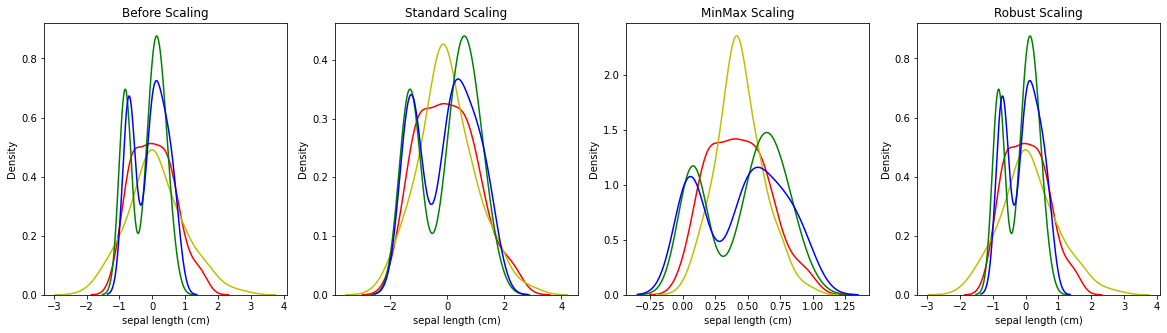

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20,5))
ax1.set_title('Before Scaling')
sns.kdeplot(iris_df_scaled['sepal length (cm)'], ax = ax1, color = 'r')
sns.kdeplot(iris_df_scaled['sepal width (cm)'], ax = ax1, color = 'y')
sns.kdeplot(iris_df_scaled['petal length (cm)'], ax = ax1, color = 'g')
sns.kdeplot(iris_df_scaled['petal width (cm)'], ax = ax1, color = 'b')
ax2.set_title('Standard Scaling')
sns.kdeplot(iris_df_sscaled['sepal length (cm)'], ax = ax2, color = 'r')
sns.kdeplot(iris_df_sscaled['sepal width (cm)'], ax = ax2, color = 'y')
sns.kdeplot(iris_df_sscaled['petal length (cm)'], ax = ax2, color = 'g')
sns.kdeplot(iris_df_sscaled['petal width (cm)'], ax = ax2, color = 'b')
ax3.set_title('MinMax Scaling')
sns.kdeplot(iris_df_mscaled['sepal length (cm)'], ax = ax3, color = 'r')
sns.kdeplot(iris_df_mscaled['sepal width (cm)'], ax = ax3, color = 'y')
sns.kdeplot(iris_df_mscaled['petal length (cm)'], ax = ax3, color = 'g')
sns.kdeplot(iris_df_mscaled['petal width (cm)'], ax = ax3, color = 'b')
ax4.set_title('Robust Scaling')
sns.kdeplot(iris_df_rbscaled['sepal length (cm)'], ax = ax4, color = 'r')
sns.kdeplot(iris_df_rbscaled['sepal width (cm)'], ax = ax4, color = 'y')
sns.kdeplot(iris_df_rbscaled['petal length (cm)'], ax = ax4, color = 'g')
sns.kdeplot(iris_df_rbscaled['petal width (cm)'], ax = ax4, color = 'b')
plt.show()

# 타이타닉 생존자 ML예측 구현

- 데이터불러오기
- 결측치처리 (null값 처리)
- 필요한 컬럼 [name, sibsp, parch, ticket, fare, passengerid, cabin] 삭제
- 컬럼중에 문자열 인코딩
- feature와 label(survived)분리 (학습데이터와 테스트 데이터 분리)
- 스케일링


In [145]:
import pandas as pd

titanic_Df = pd.read_csv('C:/apps/ml/datasets/titanic.csv')
titanic_Df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [146]:
titanic_Df.drop(columns = ['Name', 'SibSp', 'Ticket', 'PassengerId', 'Cabin', 'Fare', 'Parch'], inplace=True)

In [148]:
titanic_Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   Embarked  889 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 34.9+ KB


In [149]:
# 데이터 결측치 확인

titanic_Df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Embarked      2
dtype: int64

In [151]:
# 결측치 채우기

titanic_Df['Age'].fillna(titanic_Df['Age'].mean(), inplace=True)
titanic_Df['Embarked'].fillna('N', inplace=True)

titanic_Df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Embarked    0
dtype: int64